# Universidad de Costa Rica

# Maestría en Bioinformática y Biología de Sistemas

Minería de Datos

Cristian Vargas Mora – A96560

Práctica 5

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (1) Conjunto de datos:

In [30]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("El set de datos tiene", cancer.data.shape[0], "instancias y", cancer.data.shape[1], "atributos,", "los cuales pertenecen a las clases denominadas", cancer.target_names)

El set de datos tiene 569 instancias y 30 atributos, los cuales pertenecen a las clases denominadas ['malignant' 'benign']


# (2) Algoritmos de clasificación:

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# (3) Validación:

In [32]:
from sklearn.model_selection import train_test_split

In [267]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30, random_state=42)

# RandomForestClassifier:

In [258]:
clf=RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0, min_samples_split=2)
clf.fit(x_train, y_train)
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 0.874
Test set score: 0.854


Los parámetros por defecto producen un modelo sobreajustado.

# BernoulliNB

In [136]:
clf=BernoulliNB(alpha=1.0, binarize=0.0)
clf.fit(x_train, y_train)
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 0.867
Test set score: 0.912


Los parámetros por defecto producen un modelo desajustado.

# GradientBoostingClassifier

In [221]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
clf.fit(x_train, y_train)
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.959


Los parámetros por defecto producen un modelo sobreajustado.

# GaussianProcessClassifier

In [269]:
clf=GaussianProcessClassifier(max_iter_predict=100, n_restarts_optimizer=0, random_state=0)
clf.fit(x_train, y_train)
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.930


Los parámetros por defecto producen un modelo sobreajustado.

# MLPClassifier

In [255]:
clf=MLPClassifier(activation="relu", hidden_layer_sizes=(5,3), random_state=1, solver="adam", max_iter=500)
clf.fit(x_train, y_train)
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 0.892
Test set score: 0.947


# (4) Afinamiento de parámetros del clasificador:

# RandomForestClassifier:

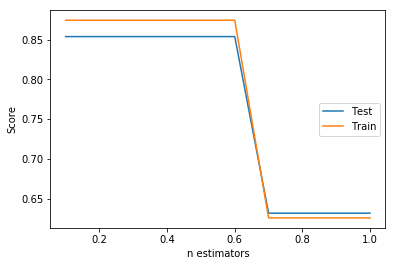

In [238]:
lista_resultados=[]
lista_resultados2=[]
numeros = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in numeros:
    clf=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=i)
    clf.fit(x_train, y_train)
    score_temp=clf.score(x_test, y_test)
    score_temp2=clf.score(x_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

El valor mínimo de n estimators produce un modelo sobreajustado y entre más se aumenta este parámetro mayor es el sobreajuste. Fijando n_estimator=1 y max_depth=1 el valor de min_samples_split para un buen ajuste es 0.6. 

# BernoulliNB

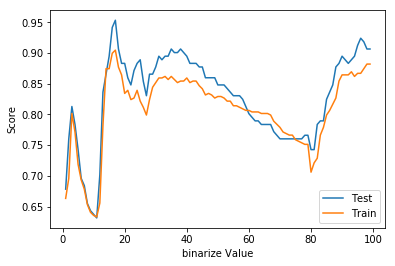

In [133]:
lista_resultados=[]
lista_resultados2=[]
numeros = range(1,100)
for i in numeros:
    clf=BernoulliNB(alpha=1.0, binarize=i)
    clf.fit(x_train, y_train)
    score_temp=clf.score(x_test, y_test)
    score_temp2=clf.score(x_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("binarize Value")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

Establecer un binarize Value de ~95 produce un modelo bien ajustado.

# GradientBoostingClassifier

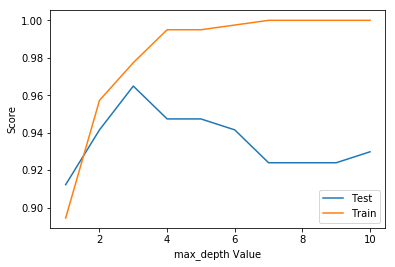

In [222]:
lista_resultados=[]
lista_resultados2=[]
numeros = range(1,11)
for i in numeros:
    clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.005, max_depth=i)
    clf.fit(x_train, y_train)
    score_temp=clf.score(x_test, y_test)
    score_temp2=clf.score(x_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("max_depth Value")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

Establecer los n_estimators en 2 produce un modelo mal ajustado, mientras que n_estimators=3 produce un modelo sobreajustado. Se fijó n_estimators=2 y se hizo el ajuste con el learning_rate. El resultado es similar. Se probó hacer el ajuste fijando los n_estimators=100 y el learning_rate=0,005 y variando el parámetro max_depth. Se obtuvo un modelo bien ajustado con max_depth=1.

# GaussianProcessClassifier

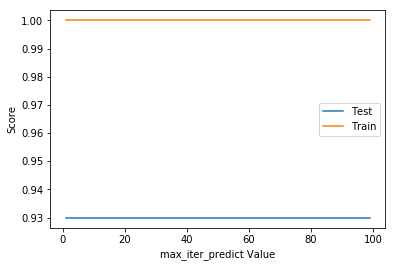

In [268]:
lista_resultados=[]
lista_resultados2=[]
numeros = range(1,100)
for i in numeros:
    clf=GaussianProcessClassifier(max_iter_predict=i, n_restarts_optimizer=0, random_state=0)
    clf.fit(x_train, y_train)
    score_temp=clf.score(x_test, y_test)
    score_temp2=clf.score(x_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("max_iter_predict Value")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

# MLPClassifier

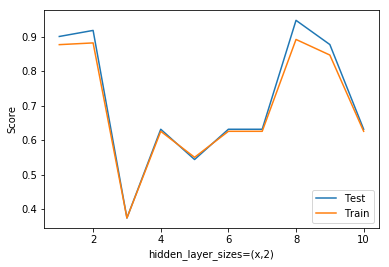

In [254]:
lista_resultados=[]
lista_resultados2=[]
numeros = range(1,11)
for i in numeros:
    clf=MLPClassifier(activation="relu", hidden_layer_sizes=(i,3), random_state=1, solver="adam", max_iter=500)
    clf.fit(x_train, y_train)
    score_temp=clf.score(x_test, y_test)
    score_temp2=clf.score(x_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("hidden_layer_sizes=(x,2)")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

# (5) Validación cruzada:

Se utilizan los mejores parámetros determinados anteriormente para los clasificadores: 

# Método de validación cruzada #1: k-fold

In [112]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [259]:
clf=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=0.6)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.82608696  0.86956522  0.88495575  0.85840708  0.86725664]


# BernoulliNB

In [260]:
clf=BernoulliNB(alpha=1.0, binarize=95)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.82608696  0.87826087  0.87610619  0.92035398  0.90265487]


# GradientBoostingClassifier

In [262]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.005, max_depth=1)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.85217391  0.86956522  0.91150442  0.92035398  0.94690265]


# GaussianProcessClassifier

In [264]:
clf=GaussianProcessClassifier(max_iter_predict=100, n_restarts_optimizer=0, random_state=0)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.86956522  0.92173913  0.91150442  0.92035398  0.91150442]


# MLPClassifier

In [270]:
clf=MLPClassifier(activation="relu", hidden_layer_sizes=(8,3), random_state=1, solver="adam", max_iter=500)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.87826087  0.92173913  0.91150442  0.91150442  0.87610619]


# Método de validación cruzada #2: Shuffle-Split CV

In [271]:
from sklearn.model_selection import ShuffleSplit

# RandomForestClassifier

In [273]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=0.6)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [ 0.87368421  0.87719298  0.87017544  0.86666667  0.87719298]


# BernoulliNB

In [274]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=BernoulliNB(alpha=1.0, binarize=95)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.88070175  0.8877193   0.8877193   0.87368421  0.87017544]


# GradientBoostingClassifier

In [275]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.005, max_depth=1)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.85964912  0.89473684  0.89824561  0.9122807   0.88421053]


# GaussianProcessClassifier

In [276]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=GaussianProcessClassifier(max_iter_predict=100, n_restarts_optimizer=0, random_state=0)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.91929825  0.91929825  0.89824561  0.90526316  0.92631579]


# MLPClassifier

In [277]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=MLPClassifier(activation="relu", hidden_layer_sizes=(8,3), random_state=1, solver="adam", max_iter=500)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.91578947  0.8877193   0.90526316  0.90526316  0.90877193]


# (6) Conclusiones:

Es posible clasificar entre tejido maligno y benigno a partir de los atributos proporcionados en el set de datos de breast cancer. Se obtienen resultados satisfactorios con los cinco algoritmos clasificadores empleados, sin embargo, es de suma importancia establecer los parámetros correctos para que la clasificación sea acertada. Para algunos algoritmos se usan pocos parámetros, inclusive al evaluar únicamente un solo parámetro se puede llegar a una buena generalización. En el caso del GaussianProcessClassifier, no hay muchas opciones para evaluar distintos parámetros y en apariencia, parece arrojar resultados sobreajustados; pero como se observa en la validación cruzada, la generalización es buena. Otros clasificadores como por ejemplo MLP o RandomForest, tienen la capacidad de variar multiples parámetros y esto permite llegar a una buena generalización con más flexibilidad. 